# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='data/credit_3530903_70301.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
# credit_df[credit_df['credit_history'] == 'no credits/all paid']

In [4]:
credit_df.head()

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good
2,>=200,6.0,critical/other existing credit,1323.0,>=7,male div/sep,4.0,car,28.0,own,2.0,skilled,2.0,yes,yes,good
3,<0,24.0,existing paid,3123.0,<1,female div/dep/mar,1.0,life insurance,27.0,own,1.0,skilled,1.0,none,yes,bad
4,<0,36.0,existing paid,5493.0,>=7,male single,4.0,no known property,42.0,for free,1.0,skilled,2.0,none,yes,good
5,>=200,9.0,existing paid,1126.0,>=7,male div/sep,4.0,real estate,49.0,own,1.0,skilled,1.0,none,yes,good


In [5]:
def filter_good(df = credit_df):
    return df[df['class'] == 'good']

def filter_bad(df = credit_df):
    return df[df['class'] == 'bad']

In [6]:
def filter(col, value, df = credit_df):
    return df[df[col] == value]

def filter_not(col, value, df = credit_df):
    return df[df[col] != value]

In [7]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,502.000,501.000,485.000,502.000,502.000,502.000
mean,21.460,3236.230,2.821,35.542,1.420,1.167
std,11.983,2843.499,1.151,11.274,0.586,0.374
min,4.000,0.000,0.000,19.000,1.000,1.000
25%,12.000,1358.000,2.000,27.000,1.000,1.000
50%,18.000,2325.000,3.000,33.000,1.000,1.000
75%,24.000,3959.000,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


In [8]:
# признак  | значения
for col in credit_df: # ['existing_credits', 'credit_history', 'employment', 'personal_status', 'job', 'property_magnitude', 'residence_since', 'duration]:
    print(col, ':\n', str(credit_df[col].unique()), '\n')

checking_status :
 ['0<=X<200' '>=200' '<0' 'no checking'] 

duration :
 [18.  6. 24. 36.  9. 10. 15. 39. 12. 48. 26.  4. 21. 30.  7. 60. 42. 14.
 72. 27. 20.  8. 13. 22. 40. 45. 11. 28. 16.] 

credit_history :
 ['existing paid' 'critical/other existing credit' 'all paid' 'unknown'
 'no credits/all paid'] 

credit_amount :
 [ 1301.  1323.  3123.  5493.  1126.  1216.  1207.  1309.  2360.  6850.
  1413.  8588.   759.  4686.  2687.   585.  2255.   609.  1361.  7127.
  1203.   700.  5507.  3190.  7119.  3488.  1113.  7966.  1532.  1503.
  2302.   662.  2273.  2631.  1311.  3105.  2319.  1374.  3612.  7763.
  3049.  1534.  2032.     0.  2864.  1255.  1333.  2022.  1552.   626.
  8858.   996.  1750.  6999.  1995.  1199.  1331.  2278.  5003.  3552.
  1928.  2964.  1546.   683. 12389.  4712.  1553.  1372.  2578.  3979.
  3234.  5954.  5433.   806.  1082.  2788.  2930.  1927.  2820.   937.
  1056.  3124.  1388.  2384.  2039.  2799.  1289.  1217.  2246.   385.
  1965.  1572.  2718.  1358.   931.

### 1. В какой шкале представлены все признаки в наборе?

|признак                | шкала                       | смысл                  | значения               |
|-----------------------|:---------------------------:|:-----------------------|:-----------------------|
|checking_status	    | номинальная (порядковая)    | ?                      | интервал/отсутствует   |
|duration			    | абсолютная                  | срок                   | натуральное число      |
|credit_history         | номинальная                 | кред.история           | `existing paid`, `critical/other existing credit`, `all paid`, `unknown`, `no credits/all paid`  |
|credit_amount          | абсолютная                  | сумм.кредита           | натуральное число      |
|employment             | номинальная (порядковая)    | стаж                   | `unemployed`, `<1`, `1<=X<4`, `4<=X<7`, `>=7`                          |
|personal_status        | номинальная                 | СП                     | `male mar/wid`, `male div/sep`, `female div/dep/mar`, `male single`    |
|residence_since        | абсолютная                  | ?                      | натуральное число      |
|property_magnitude     | номинальная                 | собствт-ть             | `real estate`,  `car`,  `life insurance`,  `no known property`         |
|age                    | порядковая                  | возраст                | натуральное число      |
|housing                | номинальная                 | где живёт              | `own`, `rent`, `free`  |
|existing_credits       | абсолютная                  | ?                      | натуральное число      |
|job                    | номинальная                 | квалификация           | `unskilled resident`, `skilled`, `high qualif/self emp/mgmt`, `unemp/unskilled non res`|
|num_dependents         | абсолютная                  | кол-во иждивенцев      | число                  |
|own_telephone          | номинальная (бинарная)      | есть телефон?          | `yes`, `none`          |
|foreign_worker         | номинальная (бинарная)      | иностранец?            | `yes`, `no`            |
|class                  | номинальная (бинарная)      | хороший заёмщик?       | `good`, `bad`          |

In [9]:
# признак  |  количество различных значений  |  примеры значений
for col in credit_df.columns:
    print(col.ljust(20, ' '), '\t', 
          len(credit_df[col].unique()), '\t', 
          str(credit_df[col].unique())[:60])

checking_status      	 4 	 ['0<=X<200' '>=200' '<0' 'no checking']
duration             	 29 	 [18.  6. 24. 36.  9. 10. 15. 39. 12. 48. 26.  4. 21. 30.  7.
credit_history       	 5 	 ['existing paid' 'critical/other existing credit' 'all paid'
credit_amount        	 474 	 [ 1301.  1323.  3123.  5493.  1126.  1216.  1207.  1309.  23
employment           	 5 	 ['>=7' '<1' '1<=X<4' 'unemployed' '4<=X<7']
personal_status      	 4 	 ['male mar/wid' 'male div/sep' 'female div/dep/mar' 'male si
residence_since      	 6 	 [ 2.  4.  1.  3. nan  0.]
property_magnitude   	 4 	 ['real estate' 'car' 'life insurance' 'no known property']
age                  	 52 	 [32. 28. 27. 42. 49. 38. 24. 36. 34. 45. 26. 20. 54. 37. 40.
housing              	 3 	 ['own' 'for free' 'rent']
existing_credits     	 4 	 [1. 2. 4. 3.]
job                  	 4 	 ['unskilled resident' 'skilled' 'high qualif/self emp/mgmt'

num_dependents       	 2 	 [1. 2.]
own_telephone        	 2 	 ['none' 'yes']
foreign_worker      

### 2. Укажите признак с наименьшей дисперсией.

**Ответ**: признак `age`

In [10]:
desc = credit_df.describe().T
desc['std'] / desc['mean']

duration            0.558
credit_amount       0.879
residence_since     0.408
age                 0.317
existing_credits    0.413
num_dependents      0.320
dtype: float64

### 3. Среднее какого признака отличается для двух классов сильнее всего?

Признака `duration`

In [11]:
diff = credit_df[credit_df['class'] == 'good'].mean() / credit_df[credit_df['class'] != 'good'].mean()
diff

duration            0.814
credit_amount       0.863
residence_since     0.959
age                 1.099
existing_credits    1.073
num_dependents      1.019
dtype: float64

In [12]:
abs(diff - 1)

duration            0.186
credit_amount       0.137
residence_since     0.041
age                 0.099
existing_credits    0.073
num_dependents      0.019
dtype: float64

### 4. В каком классе больше всего skilled работников?

**Ответ**: В классе bad

In [13]:
skilled = filter('job', 'skilled')
notskilled = filter_not('job', 'skilled')

skilled_good = filter_good(skilled)
notskilled_good = filter_good(notskilled)

print(round(100 * len(skilled_good) / len(skilled), 2), "% skilled работников имеют класс good")
print(round(100 * len(notskilled_good) / len(notskilled), 2), "% прочих работников имеют класс good")

66.56 % skilled работников имеют класс good
68.68 % прочих работников имеют класс good


In [14]:
good = filter_good()
bad = filter_bad()

skilled_bad = filter('job', 'skilled', bad)

print(100 * len(skilled_good) / len(good), "% good работников являются skilled")
print(100 * len(skilled_bad) / len(bad), "% bad работников являются skilled")

63.01775147928994 % good работников являются skilled
65.2439024390244 % bad работников являются skilled


### 5. Есть ли в наборе признаки с выбросами? Какие?

<AxesSubplot:>

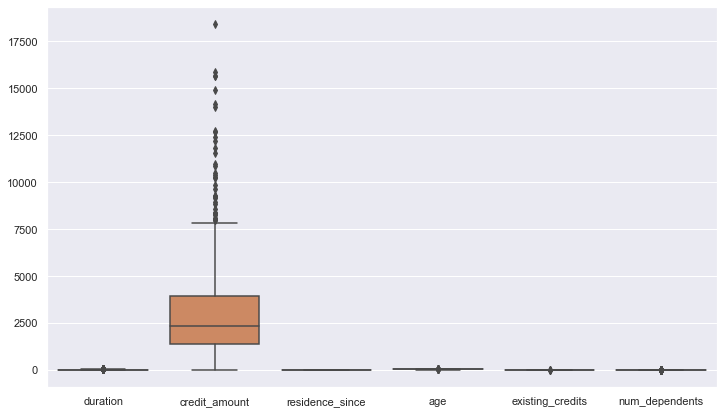

In [15]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)

In [16]:
mean = credit_df.describe().T['mean']
mean

duration              21.460
credit_amount       3236.230
residence_since        2.821
age                   35.542
existing_credits       1.420
num_dependents         1.167
Name: mean, dtype: float64

<AxesSubplot:>

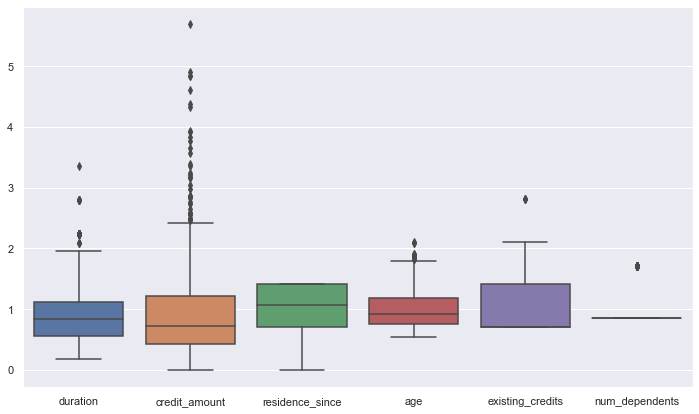

In [52]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=(credit_df[mean.index] / mean))

### 6. Сколько пропущенных значений в наборе?

In [18]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     502 non-null    object 
 1   duration            502 non-null    float64
 2   credit_history      502 non-null    object 
 3   credit_amount       501 non-null    float64
 4   employment          502 non-null    object 
 5   personal_status     502 non-null    object 
 6   residence_since     485 non-null    float64
 7   property_magnitude  502 non-null    object 
 8   age                 502 non-null    float64
 9   housing             502 non-null    object 
 10  existing_credits    502 non-null    float64
 11  job                 502 non-null    object 
 12  num_dependents      502 non-null    float64
 13  own_telephone       502 non-null    object 
 14  foreign_worker      502 non-null    object 
 15  class               502 non-null    object 
dtypes: float

In [19]:
credit_df.isnull().sum()

checking_status        0
duration               0
credit_history         0
credit_amount          1
employment             0
personal_status        0
residence_since       17
property_magnitude     0
age                    0
housing                0
existing_credits       0
job                    0
num_dependents         0
own_telephone          0
foreign_worker         0
class                  0
dtype: int64

In [20]:
len(credit_df[(credit_df.credit_amount == 0)])

8

In [21]:
missed = credit_df[(credit_df.credit_amount == 0)\
                  | (credit_df.credit_amount != credit_df.credit_amount)
                  | (credit_df.credit_amount == None)]
missed.head()

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
45,<0,30.0,existing paid,0.0,>=7,male single,4.0,life insurance,31.0,own,1.0,skilled,1.0,none,yes,bad
72,<0,48.0,existing paid,0.0,1<=X<4,female div/dep/mar,2.0,car,31.0,own,1.0,skilled,1.0,yes,yes,bad
87,no checking,12.0,existing paid,0.0,>=7,female div/dep/mar,4.0,no known property,52.0,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
137,0<=X<200,24.0,existing paid,0.0,<1,female div/dep/mar,4.0,car,25.0,own,1.0,unskilled resident,1.0,yes,yes,bad
186,no checking,24.0,critical/other existing credit,0.0,<1,male mar/wid,3.0,no known property,47.0,for free,3.0,skilled,1.0,yes,yes,good


In [22]:
len(missed)

9

In [23]:
### 7. Попытайтесь заполнить пропущенные значения.

In [24]:
credited_filled = credit_df.copy()

In [25]:
credited_filled[]

SyntaxError: invalid syntax (<ipython-input-25-ee8de93fc2d5>, line 1)

In [ ]:
### 8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

In [ ]:
# порядковая
sns.distplot(credit_df.age)

In [ ]:
# номинальная (порядковая)
sns.countplot(credit_df.employment)

In [ ]:
# бинарный
sns.countplot(credit_df.own_telephone)

In [ ]:
# абсолютная
sns.distplot(credit_df.credit_amount)

In [47]:
### 9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

NameError: name 'employment' is not defined

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='employment', ylabel='count'>

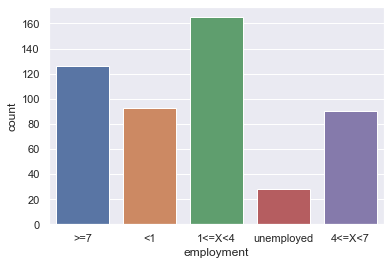

In [48]:
# номинальная (порядковая)
sns.countplot(credit_df.employment)

In [ ]:
# бинарный
sns.countplot(credit_df.own_telephone)

In [ ]:
# абсолютная
sns.distplot(credit_df.credit_amount)

In [ ]:
### 9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

### 10. Какой признак(и) имеет смысл стандартизировать? Почему?
* Признаки `checking_status` и `employment` можно сделать порядковыми, чтобы их можно было сравнивать.
* Признак `foreign_worker` частично дублируется в признаке `job`.


### 11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.
* Признак `sex` можно извлечь из признака `personal_status`. 

In [ ]:
time credit_df.groupby(['job']).agg([lambda x: ','.join(x), lambda x: set(x)])

In [ ]:
set(['a', 'a']).pop()

In [ ]:
time credit_df.groupby(['job'])['checking_status'].apply(lambda x: ','.join(x))

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='own_telephone', ylabel='count'>

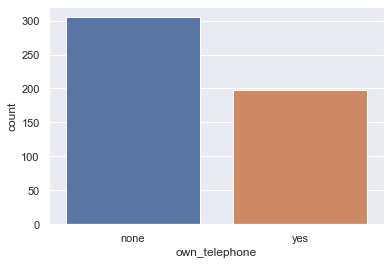

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

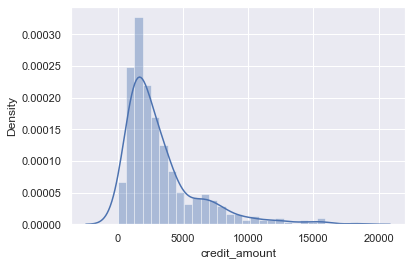

In [50]:
# абсолютная
sns.distplot(credit_df.credit_amount)

In [ ]:
### 9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

### 10. Какой признак(и) имеет смысл стандартизировать? Почему?
* Признаки `checking_status` и `employment` можно сделать порядковыми, чтобы их можно было сравнивать.
* Признак `foreign_worker` частично дублируется в признаке `job`.


### 11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.
* Признак `sex` можно извлечь из признака `personal_status`. 

In [64]:
time credit_df.groupby(['job']).agg([lambda x: ','.join(x), lambda x: set(x)])

CPU times: user 31.3 ms, sys: 2.39 ms, total: 33.7 ms
Wall time: 33.6 ms


checking_status  \
                                                                  <lambda_0>   
job                                                                            
high qualif/self emp/mgmt  0<=X<200,no checking,no checking,<0,<0,0<=X<20...   
skilled                    >=200,<0,<0,>=200,0<=X<200,<0,>=200,no checkin...   
unemp/unskilled non res    <0,no checking,0<=X<200,>=200,>=200,0<=X<200,0...   
unskilled resident         0<=X<200,no checking,<0,0<=X<200,no checking,<...   

                                                               \
                                                   <lambda_1>   
job                                                             
high qualif/self emp/mgmt  {<0, >=200, no checking, 0<=X<200}   
skilled                    {<0, no checking, >=200, 0<=X<200}   
unemp/unskilled non res    {<0, >=200, no checking, 0<=X<200}   
unskilled resident         {<0, >=200, no checking, 0<=X<200}   

                                                              credit_history  \
                                                                  <lambda_0>   
job                                                                            
high qualif/self emp/mgmt  all paid,existing paid,existing paid,existing ...   
skilled                    critical/other existing credit,existing paid,e...   
unemp/unskilled non res    existing paid,critical/other existing credit,a...   
unskilled resident         existing paid,existing paid,critical/other exi...   

                                                                              \
                                                                  <lambda_1>   
job                                                                            
high qualif/self emp/mgmt  {critical/other existing credit, unknown, no c...   
skilled                    {critical/other existing credit, unknown, no c...   
unemp/unskilled non res    {existing paid, critical/other existing credit...   
unskilled resident         {critical/other existing credit, unknown, no c...   

                                                                  employment  \
                                                                  <lambda_0>   
job                                                                            
high qualif/self emp/mgmt  unemployed,>=7,1<=X<4,unemployed,>=7,4<=X<7,1<...   
skilled                    >=7,<1,>=7,>=7,<1,<1,1<=X<4,1<=X<4,4<=X<7,4<=X...   
unemp/unskilled non res    unemployed,unemployed,<1,1<=X<4,unemployed,<1,...   
unskilled resident         >=7,1<=X<4,<1,1<=X<4,4<=X<7,<1,<1,1<=X<4,>=7,1...   

                                                                  \
                                                      <lambda_1>   
job                                                                
high qualif/self emp/mgmt  {1<=X<4, unemployed, <1, >=7, 4<=X<7}   
skilled                    {1<=X<4, unemployed, <1, >=7, 4<=X<7}   
unemp/unskilled non res                 {<1, 1<=X<4, unemployed}   
unskilled resident                     {<1, >=7, 1<=X<4, 4<=X<7}   

                                                             personal_status  \
                                                                  <lambda_0>   
job                                                                            
high qualif/self emp/mgmt  male single,male single,male single,female div...   
skilled                    male div/sep,female div/dep/mar,male single,ma...   
unemp/unskilled non res    female div/dep/mar,female div/dep/mar,female d...   
unskilled resident         male mar/wid,male single,male single,female di...   

                                                                              \
                                                                  <lambda_1>   
job                                                                            
high qualif/self emp/mgmt  {female div/dep/mar, male div/sep, male mar/wi...   
ski

In [68]:
set(['a', 'a']).pop()

'a'

In [62]:
time credit_df.groupby(['job'])['checking_status'].apply(lambda x: ','.join(x))

CPU times: user 1.6 ms, sys: 207 µs, total: 1.81 ms
Wall time: 1.64 ms


job
high qualif/self emp/mgmt    0<=X<200,no checking,no checking,<0,<0,0<=X<20...
skilled                      >=200,<0,<0,>=200,0<=X<200,<0,>=200,no checkin...
unemp/unskilled non res      <0,no checking,0<=X<200,>=200,>=200,0<=X<200,0...
unskilled resident           0<=X<200,no checking,<0,0<=X<200,no checking,<...
Name: checking_status, dtype: object